In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
td = pd.read_csv('Ecommerce Customers.csv')

In [7]:
td.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## DATA VISUALIZATION

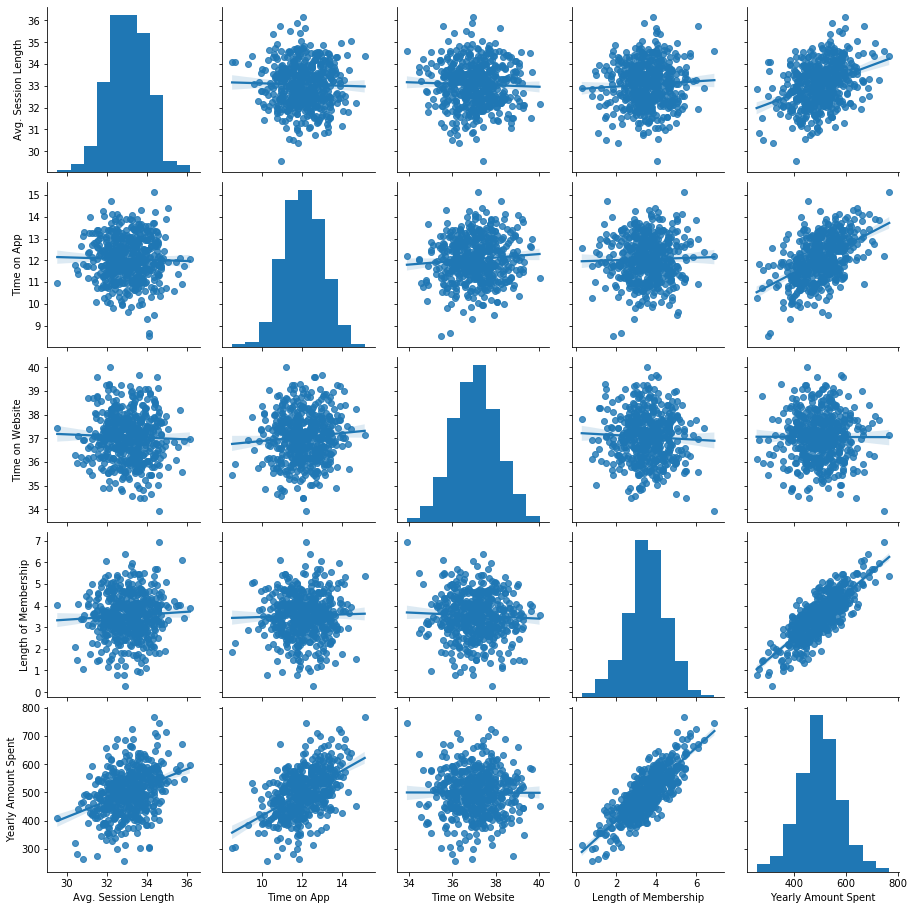

In [8]:
# Fit linear regression models to the scatter plots:
sns.pairplot(td, kind = 'reg') 

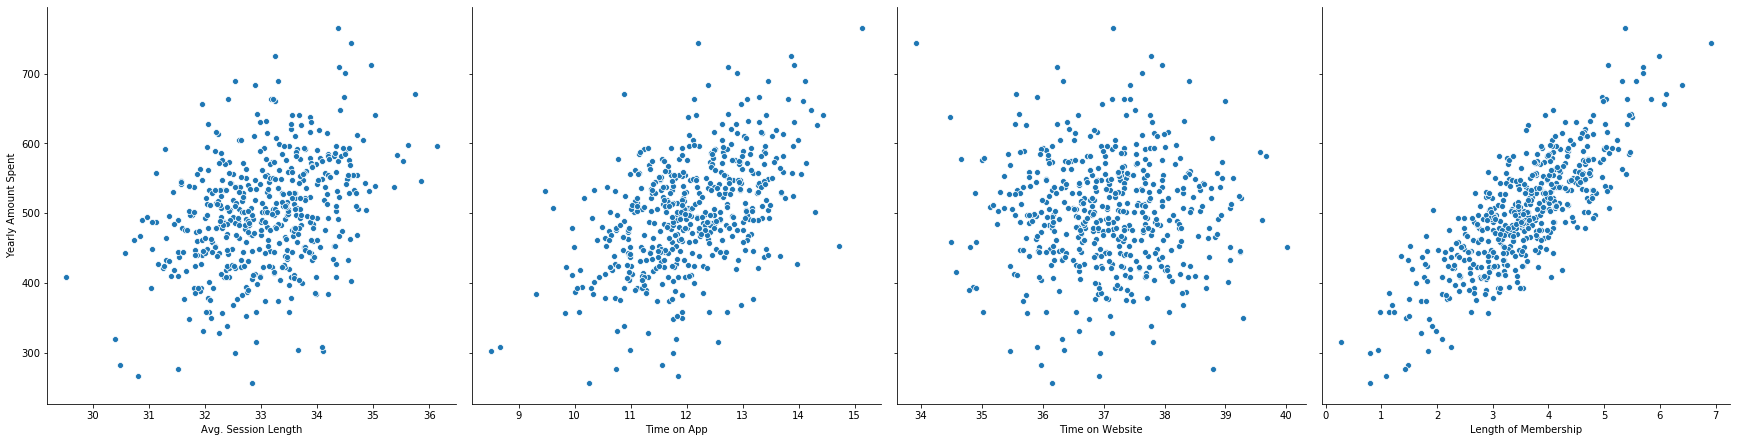

In [12]:
sns.pairplot(td, x_vars =['Avg. Session Length', 'Time on App','Time on Website','Length of Membership'], y_vars = ['Yearly Amount Spent'], height = 6)

## DATA  CLEANING

In [13]:
td.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [14]:
td.dropna(inplace = True)

In [15]:
td.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
td.drop(['Email', 'Address', 'Avatar'], inplace = True, axis = 1)

In [17]:
td.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


## TRAINING DATA

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [105]:
X = td[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = td.iloc[:, [4]]

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [82]:
# create model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
model.coef_

array([[25.88815047, 38.87046474,  0.47066154, 61.78369022]])

### Scatterplot of the real test values versus the predicted values

In [85]:
sns.set_style('whitegrid')

Text(0, 0.5, 'PREDICTION BY MODEL')

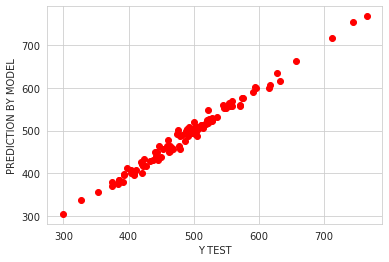

In [86]:
plt.scatter(y_test, y_pred,c = 'r')
plt.xlabel('Y TEST')
plt.ylabel('PREDICTION BY MODEL')

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.645674798915295
Mean Squared Error: 92.89010304498562
Root Mean Squared Error: 9.637951185028156


In [98]:
print('SCORE OF OUR MODEL :' + str(model.score(X_test, y_test) * 100) + "%")

SCORE OF OUR MODEL :98.61924261981547%


In [89]:
import statsmodels.api as sm
X = np.column_stack((td['Avg. Session Length'], td['Time on App'],td['Time on Website'],td['Length of Membership']))
y = td['Yearly Amount Spent']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                         23:01:54   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1051.5943     22.993    -45.73

## Graph between actual values and predicted values 

In [116]:
table = pd.DataFrame(model.coef_.reshape((4,)),X.columns) 
table.columns = ['Coeffecient']
table

,Coeffecient
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

### So as Time on App is a much more significant factor than Time on Website, the company has a choice: they could either focus all the attention into the App as that is what is bringing the most money in, or they could focus on the Website as it is performing so poorly!

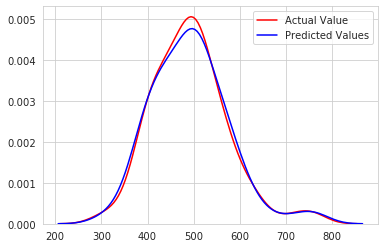

In [90]:
ax1 = sns.distplot(y_test, hist = False, color="r", label = "Actual Value" )
sns.distplot(y_pred, hist = False, color="b", label = "Predicted Values" , ax = ax1 )